<a href="https://colab.research.google.com/github/dipak12-11/P1-Heart-Disease-Classifier/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Satement :
**Given Clinical parameters about a patient,can we predict whether or not they have heart disease?**

# Data

The original data camefrom the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease)from UCI Machine Learning REpository.
However,we've downloaded it ina formatted way from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

The Original database contains 76 attributes,but here only 14 attributes(features) will be used.

# Evaluation Metrics

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept,we'll pursue this project

# Data Dictionary

**The following are the features we'll use to predict our target variable (heart disease or no heart disease).**
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.yes, 0=no) (= the predicted attributens: signs of unhealthy heart


# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to apper in the notebook
%matplotlib inline

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluators
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

#Experimenting.
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform


#print last updated
import time
print(f"Last updated:{time.asctime()}")

Last updated:Thu Jun 27 10:36:38 2024


# Load Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/heart-disease.csv'
# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df=pd.read_csv(file_path)
df.shape #(rows,columns)

Mounted at /content/drive


(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [8]:
df.target.value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

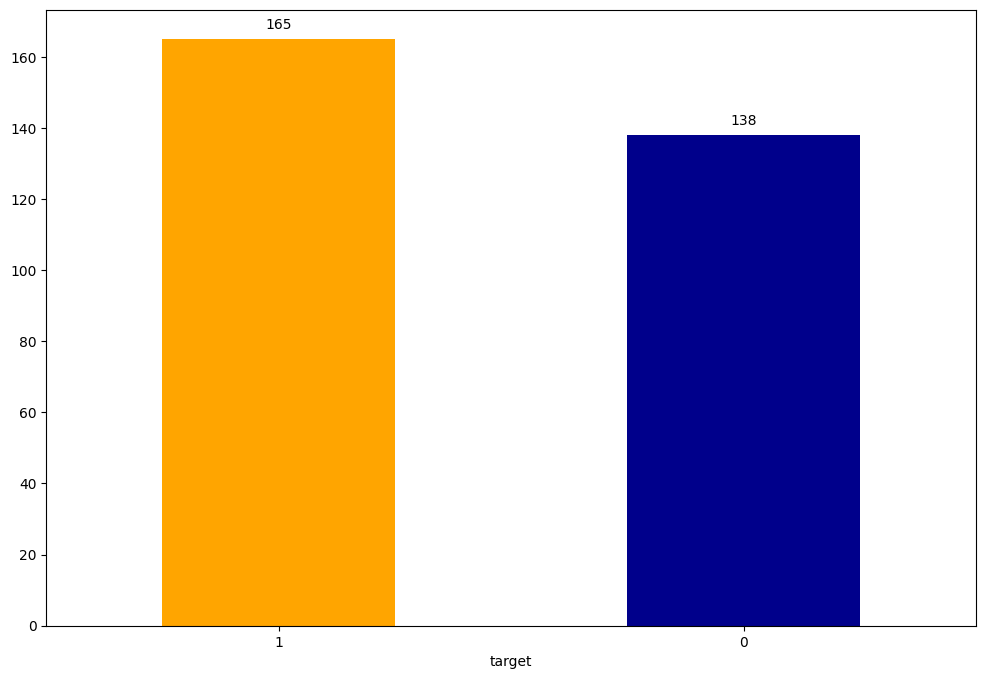

In [9]:
#Let's visuallise the value counts with a bar graph
ax=df.target.value_counts().plot.bar(figsize=(12,8),color=["orange","darkblue"])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha="center",va="center",xytext=(0,10),textcoords="offset points")
plt.xticks(rotation=0)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Heart Disease Frequency according to the Gender.**

In [12]:
#sex - (1 = male; 0 = female)
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


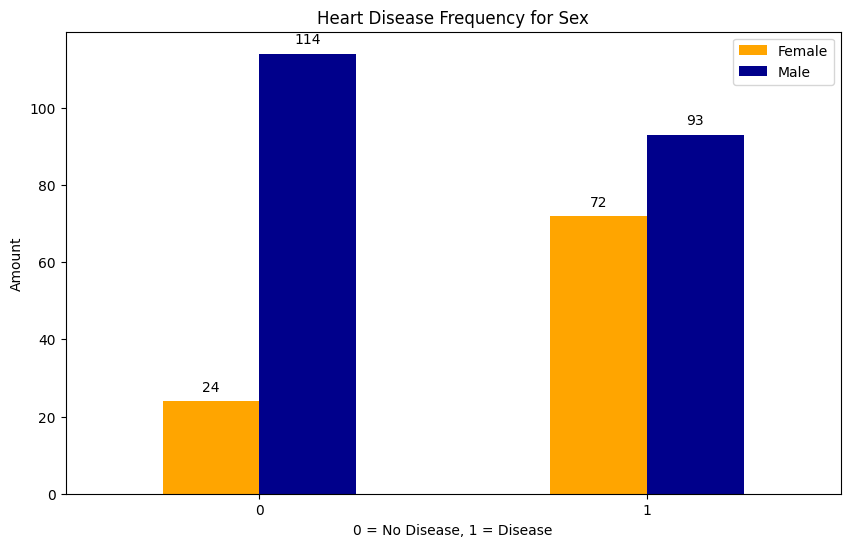

In [14]:
ax=pd.crosstab(df.target,df.sex).plot.bar(figsize=(10,6),color=["orange","darkblue"])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show()

**Age Vs Max Heart Rate for Heart Diasease**

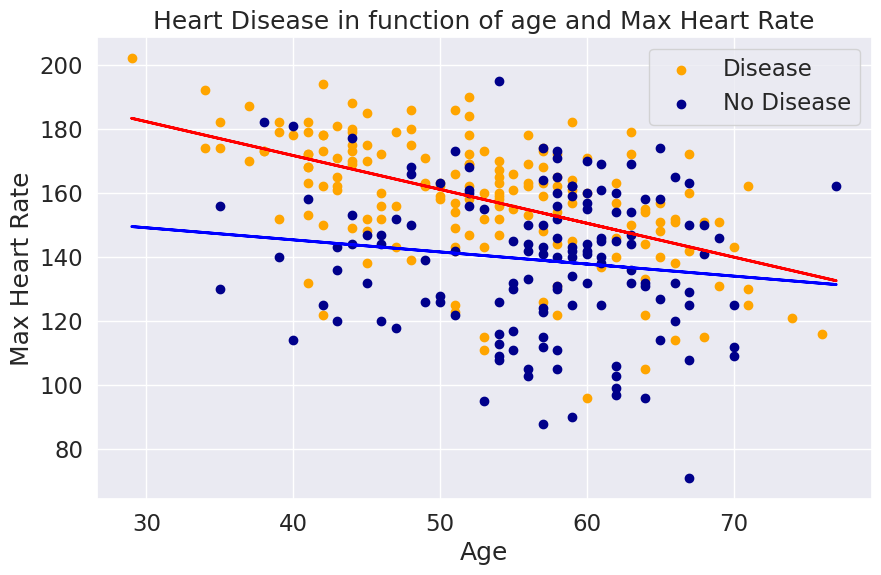

In [62]:
# create another figure
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
#start with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="orange",label="Disease")
model_disease=LinearRegression()
X_disease=df.age[df.target==1].values.reshape(-1,1)
y_disease=df.thalach[df.target==1].values
model_disease.fit(X_disease,y_disease)
plt.plot(df.age.values,model_disease.predict(df.age.values.reshape(-1,1)),color="red",linewidth=2)
#target with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="darkblue",label="No Disease")
model_no_disease=LinearRegression()
X_no_disease=df.age[df.target==0].values.reshape(-1,1)
y_no_disease=df.thalach[df.target==0].values
model_no_disease.fit(X_no_disease,y_no_disease)
plt.plot(df.age.values,model_no_disease.predict(df.age.values.reshape(-1,1)),color="blue",linewidth=2)
plt.title("Heart Disease in function of age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend()
plt.show()

**Corelationbetween independent variables**

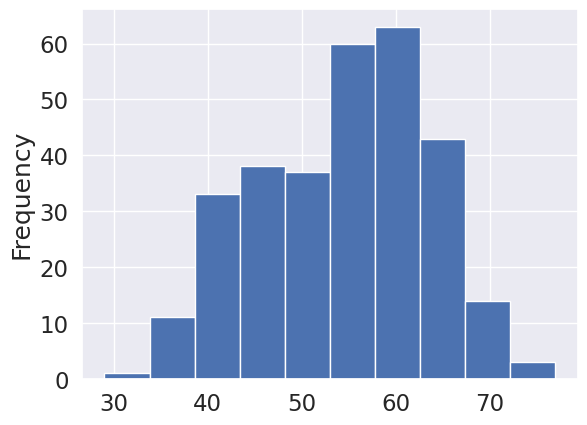

In [63]:
#Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

In [64]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


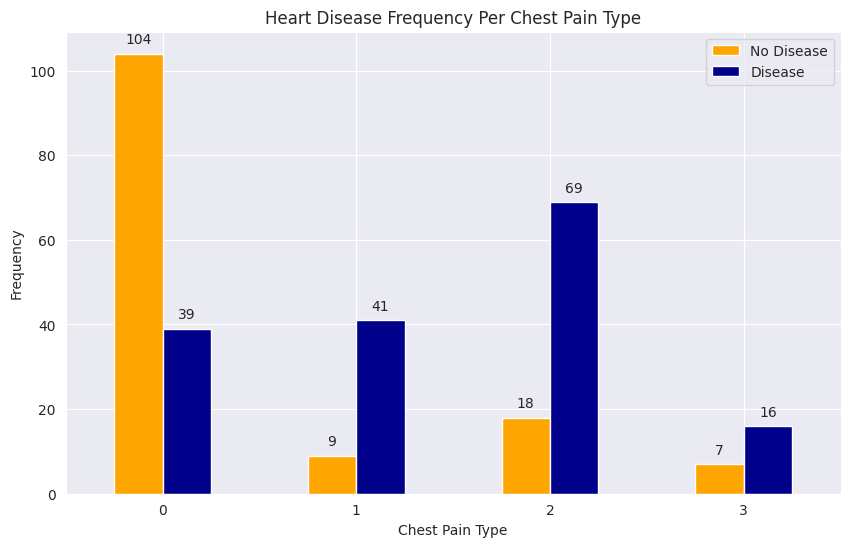

In [18]:
ax=pd.crosstab(df.cp,df.target).plot.bar(figsize=(10,6),color=["orange","darkblue"])
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha="center",va="center",xytext=(0,10),textcoords="offset points")
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)
plt.show()

In [19]:
corr_matrix=df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


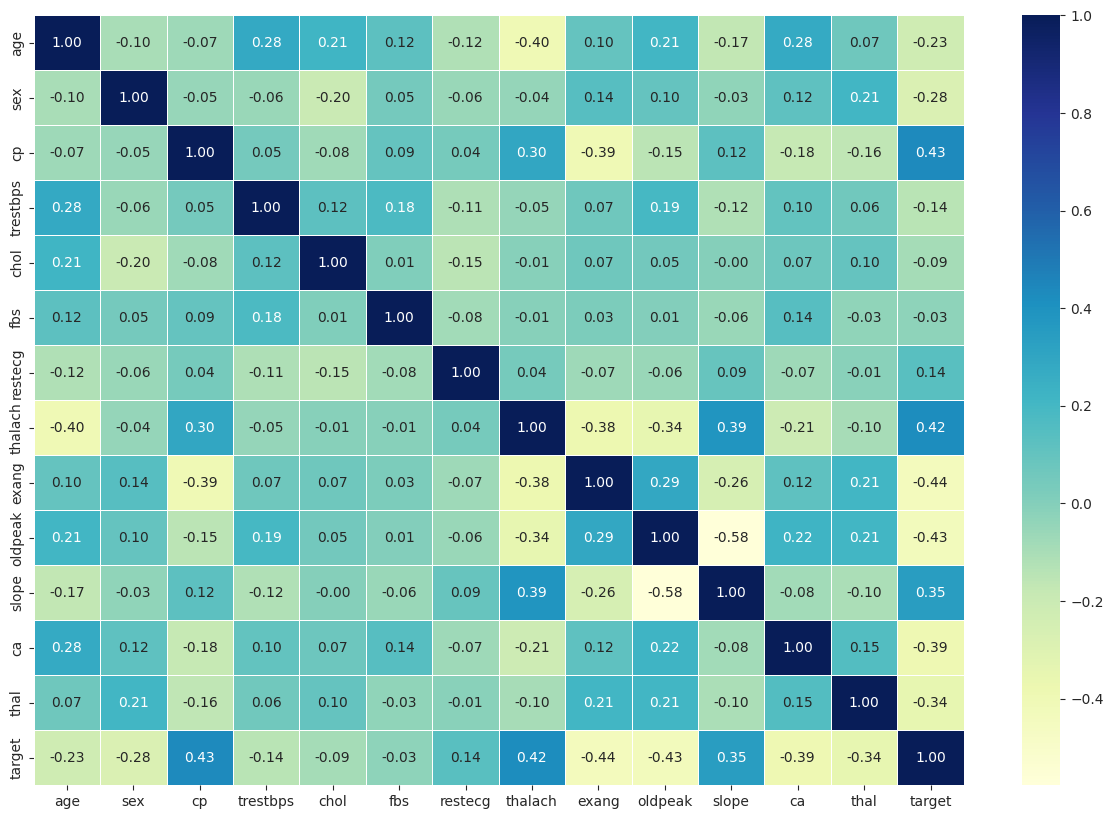

In [20]:
#Let's make it look a little more eye appealing
corr_matrix=df.corr()
sns.set_style("ticks")
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu");

# Modeling
**Baseline Models**

In [21]:
#everything except target variable
X=df.drop("target",axis=1)

#Target vaiable
y=df.target.values

**Creating 3 sets : Train,Validate,test**

In [22]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

In [ ]:
# heart_disease_shuffled = df.sample(frac=1)
# train_split=round(0.7*len(heart_disease_shuffled))
# validation_split=round(train_split+0.15*len(heart_disease_shuffled))
# X_train,y_train=X[:train_split],y[:train_split]
# X_valid,y_valid=X[train_split:validation_split],y[train_split:validation_split]
# X_test,y_test=X[validation_split:],y[validation_split:]

**Model Choices:**
* Logestic Regression
* K-Nearest Neighbors
* Random Forest
* Linear SVC

In [ ]:
# # Put models in a dictionary
# models={"KNN":KNeighborsClassifier(),
#        "Logestic Regression": LogisticRegression(),
#         "Random Forest": RandomForestClassifier(n_estimators=150),
#        "linearSVC":LinearSVC()}

# def fit_and_score(models,X_train,y_train,X_valid,y_valid):
#     np.random.seed(90)
#     model_scores={}
#     for name,model in models.items():
#         model.fit(X_train,y_train)
#         model_scores[name]=model.score(X_valid,y_valid)
#     return model_scores
# model_scores=fit_and_score(models=models,X_train=X_train,y_train=y_train,X_valid=X_valid,y_valid=y_valid)
# model_scores

In [79]:
models={"KNN":KNeighborsClassifier(),
       "Logestic Regression": LogisticRegression(max_iter=10000),
        "Random Forest": RandomForestClassifier(n_estimators=150),
       "linearSVC":LinearSVC(max_iter=1000,dual=False)}

# Function to evaluate models using cross-validation
def evaluate_models_cv(models, X, y, cv=5):
    np.random.seed(90)
    model_scores = {}
    skf = StratifiedKFold(n_splits=cv, shuffle=True,random_state=90)

    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=skf)
        model_scores[name] = scores.mean()

    return model_scores

# Assuming X and y are your features and target variables
model_scores_cv = evaluate_models_cv(models=models, X=X_train, y=y_train, cv=5)
model_scores_cv

{'KNN': 0.6322278911564626,
 'Logestic Regression': 0.8390306122448979,
 'Random Forest': 0.8392006802721088,
 'linearSVC': 0.826530612244898}

# Model Comparision

In [80]:
model_compare=pd.DataFrame(model_scores_cv,index=["accuracy"])
model_compare

,KNN,Logestic Regression,Random Forest,linearSVC
accuracy,0.632228,0.839031,0.839201,0.826531


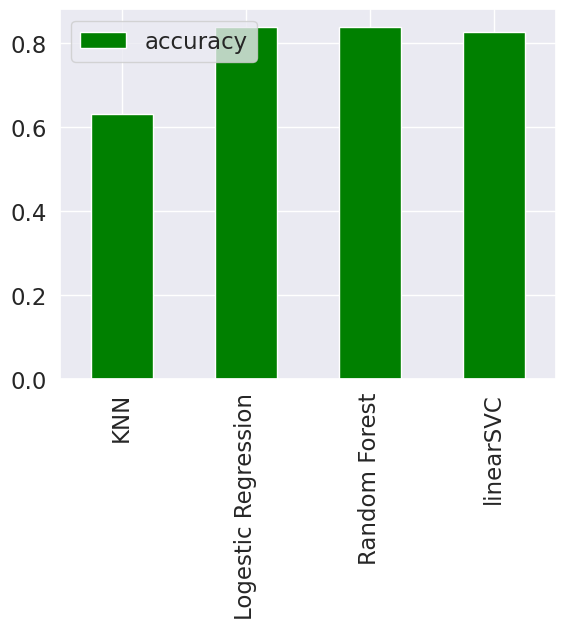

In [81]:
model_compare.T.plot.bar(color="green");

# Hyperparameters Tuning

**Tuning KNN CLassifier**

In [26]:
#using standardScaler, pipeline along with RandomizedSearchCV
knn = KNeighborsClassifier()
# Create a pipeline that first scales the data, then applies KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', knn)
])
param_distributions = {
    'knn__n_neighbors': np.arange(1, 30),
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__weights': ['uniform', 'distance']
}
# Use RandomizedSearchCV to search for the best hyperparameters
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train);


In [27]:
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-validation Score:{random_search.best_score_}")

Best Parameters: {'knn__weights': 'uniform', 'knn__n_neighbors': 5, 'knn__metric': 'manhattan'}
Best Cross-validation Score:0.8426020408163266


In [28]:
#using StandardScaler,pipeline along with GridSearhCV
knn = KNeighborsClassifier()
scaler = StandardScaler()
# Create a pipeline that first scales the data, then applies KNN
pipeline = Pipeline([
    ('scaler', scaler),
    ('knn', knn)
])

# Define the parameter grid
param_grid = {
    'knn__n_neighbors': [5, 10,  25],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__weights': ['uniform', 'distance']
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train);

In [29]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score:{grid_search.best_score_}")

Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Best Cross-validation Score:0.8426020408163266


**The Best Parameters from both RandomisedSearchCV and GridSearchCV are same.**

**Now let's test our KNN classifier on our test set**

In [30]:
#Moment of truth
best_knn=grid_search.best_estimator_
print(f"Test Set Score:{best_knn.score(X_test,y_test)}")

Test Set Score:0.8360655737704918


**Tuning RandomForestCLassifier**

In [83]:
#using pipe RandomisedSearchCV
param_distribution={
    'n_estimators': np.arange(50,200),
    'max_depth': np.arange(10,50),
    "min_samples_split": np.arange(2,20),
    "min_samples_leaf": np.arange(1,10),
    "max_features":[None,'sqrt','log2'],
    "bootstrap":[True,False]
}
rf=RandomForestClassifier(random_state=42)
random_search=RandomizedSearchCV(rf,param_distribution,n_iter=175,cv=5,scoring='accuracy',random_state=42,n_jobs=-1)
random_search.fit(X_train,y_train)
best_params_random = random_search.best_params_

In [84]:
print(f"Best Parameters:{random_search.best_params_}")
print(f"Best Cross-validation Score:{random_search.best_score_}")

Best Parameters:{'n_estimators': 71, 'min_samples_split': 17, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_depth': 21, 'bootstrap': True}
Best Cross-validation Score:0.8263605442176871


In [85]:
#using the gridSearchCV
param_grid = {
    'n_estimators': [best_params_random['n_estimators'] - 20, best_params_random['n_estimators'], best_params_random['n_estimators'] + 20],
    'max_depth': [best_params_random['max_depth'] - 5, best_params_random['max_depth'], best_params_random['max_depth'] + 5],
    'min_samples_split': [best_params_random['min_samples_split'], best_params_random['min_samples_split'] + 2],
    'min_samples_leaf': [best_params_random['min_samples_leaf'], best_params_random['min_samples_leaf'] + 1],
    'max_features': [best_params_random['max_features']],
    'bootstrap': [best_params_random['bootstrap']]
}
# param_grid={
#     'n_estimators':[71,146,150],
#     'max_depth':[19,20,21,22],
#     'min_samples_split':[15,17,19,18],
#     'min_samples_leaf':[6,9,10,14],
#     "max_features":['sqrt','log2'],
#     "bootstrap":[True]
# }
rf=RandomForestClassifier(random_state=42)
grid_search=GridSearchCV(rf,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train);

In [86]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score:{grid_search.best_score_}")

Best Parameters: {'bootstrap': True, 'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 17, 'n_estimators': 71}
Best Cross-validation Score:0.8263605442176871


In [35]:
#Moment of truth
best_rf=grid_search.best_estimator_
print(f"Test Set Score:{best_rf.score(X_test,y_test)}")

Test Set Score:0.8852459016393442


**Tuninng Logestic Regression**

In [36]:
#using StandardScaler,pipeline along with RandomSearchCV
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('logistic',LogisticRegression(max_iter=10000))
])
param_distribution={
    "logistic__penalty":['l1',"l2"],
    'logistic__C':np.logspace(-10, 10, 1000),
    'logistic__solver':['liblinear','saga']
}
random_search=RandomizedSearchCV(pipeline,param_distributions=param_distribution,n_iter=250,scoring='accuracy',n_jobs=-1,cv=5,verbose=2,random_state=42)
random_search.fit(X_train,y_train);
best_params_random=random_search.best_params_

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


In [37]:
print(f"best parameters:{random_search.best_params_}")
print(f"best Cross-Validaion Score:{random_search.best_score_}")

best parameters:{'logistic__solver': 'liblinear', 'logistic__penalty': 'l2', 'logistic__C': 0.008089243486805939}
best Cross-Validaion Score:0.822278911564626


In [39]:
#using standardScaler,pipeline along with RandomSearchCV
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('logistic',LogisticRegression(max_iter=10000))
])
param_grid={
    'logistic__penalty':["l2"],
    'logistic__C':np.logspace(best_params_random['logistic__C']-15,best_params_random['logistic__C']+10,2000),
    'logistic__solver':['liblinear']
}
grid_search=GridSearchCV(pipeline,param_grid=param_grid,scoring='accuracy',n_jobs=-1,cv=5,verbose=2)
grid_search.fit(X_train,y_train);

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


In [40]:
print(f"best Parameters:{grid_search.best_params_}")
print(f"best Cross-Validation Score:{grid_search.best_score_}")

best Parameters:{'logistic__C': 0.009762925805675558, 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear'}
best Cross-Validation Score:0.8263605442176871


In [41]:
#Moment of truth
best_log_reg=grid_search.best_estimator_
print(f"Test Set Score:{best_log_reg.score(X_test,y_test)}")

Test Set Score:0.8852459016393442


# Evaluating a classification model, beyond accuracy:

In [42]:
# let's make prediction using our randomForest CLassifier.
y_preds=best_rf.predict(X_test)

In [43]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [44]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

**Confusion Matrix**

True Positives (TP): 29
False Positives (FP): 4
False Negatives (FN): 3
True Negatives (TN): 25


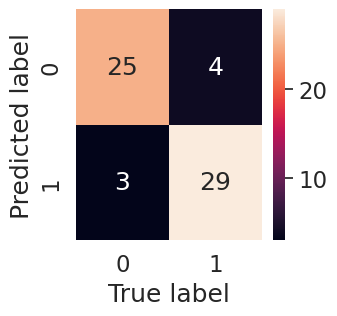

In [45]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig,ax=plt.subplots(figsize=(3,3))
    cm=confusion_matrix(y_test,y_preds)
    ax=sns.heatmap(cm,
                  annot=True)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    return cm.ravel()
TN, FP, FN, TP =plot_conf_mat(y_test,y_preds)
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

**Reciver Operating Characteristics**

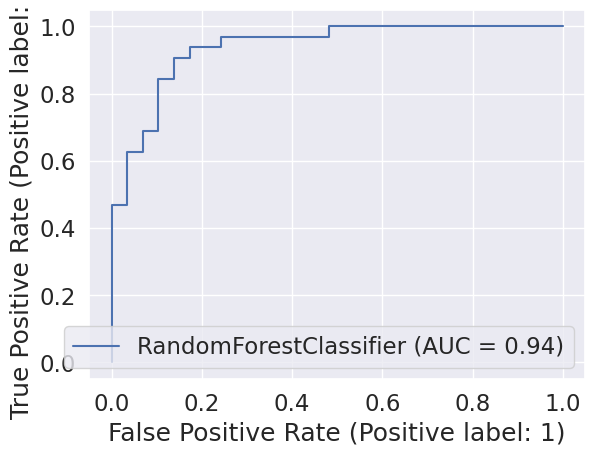

In [46]:
RocCurveDisplay.from_estimator(best_rf,X_test,y_test);

**Classification Report**

In [47]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



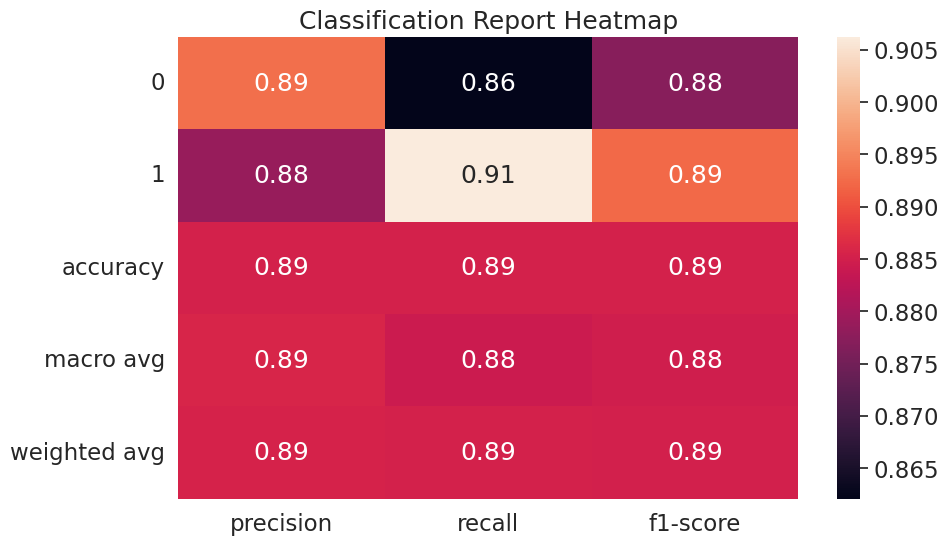

In [48]:
report = classification_report(y_test, y_preds, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Remove 'support' column as it's not useful in heatmap
df_report = df_report.drop(columns=['support'])

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_report, annot=True, fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()

**Cross-Validation**

In [49]:
cv_acc=cross_val_score(best_rf,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8250273224043717

In [50]:
cv_precision=cross_val_score(best_rf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8278955956375311

In [51]:
cv_recall=cross_val_score(best_rf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8606060606060606

In [52]:
cv_f1=cross_val_score(best_rf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8431076106331862

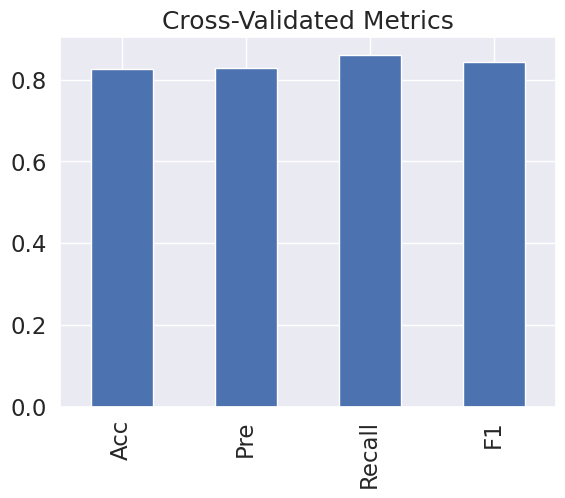

In [53]:
cv_metrics=pd.DataFrame({"Acc":cv_acc,"Pre":cv_precision,"Recall":cv_recall,"F1":cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics",legend=False);

# Feature Importance

In [54]:
importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [56]:
importances = best_rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

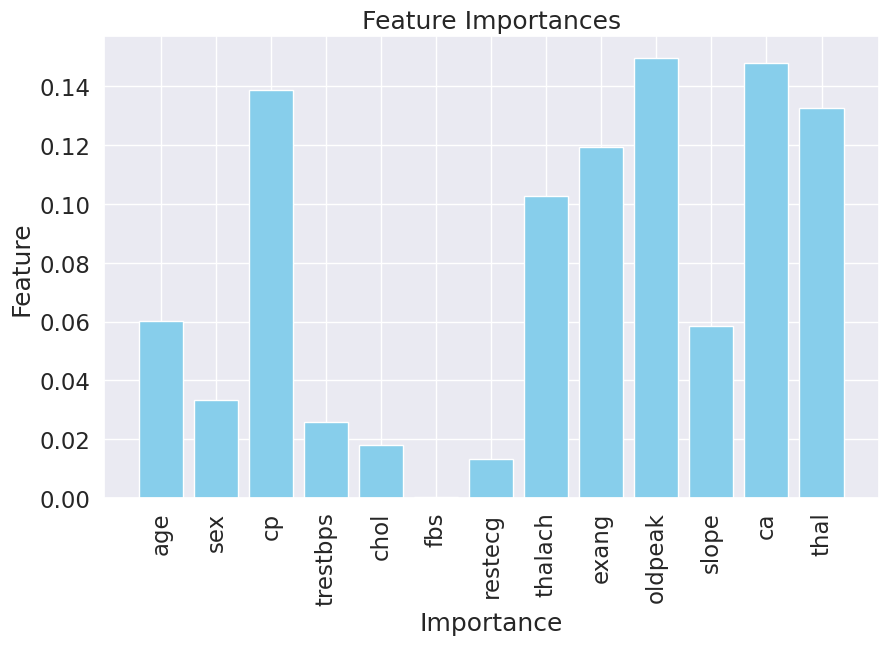

In [57]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()